# Plotting  Mulliken-Projected Band Structures

In [1]:
%matplotlib inline
# these two lines are only necessary to make the jupyter notebooks run on binder
import sys
sys.path.insert(0, "../..")

# We load the respective module
from aimstools.bandstructures import MullikenBandStructure as mbs

# We initialize the MullikenBandStructure object from a directory.
# The bandmlkxxxx.out files can become very large, so reading them in can take up some time.
bs = mbs("fatbands", soc=True)

INFO     | Reading in mulliken bandfiles in serial ...
INFO     | 	 ... processed bandmlk1001.out in 0.37 seconds.
INFO     | 	 ... processed bandmlk1002.out in 0.37 seconds.
INFO     | 	 ... processed bandmlk1003.out in 0.44 seconds.
INFO     | Creating spectrum from bands took 0.01 seconds.


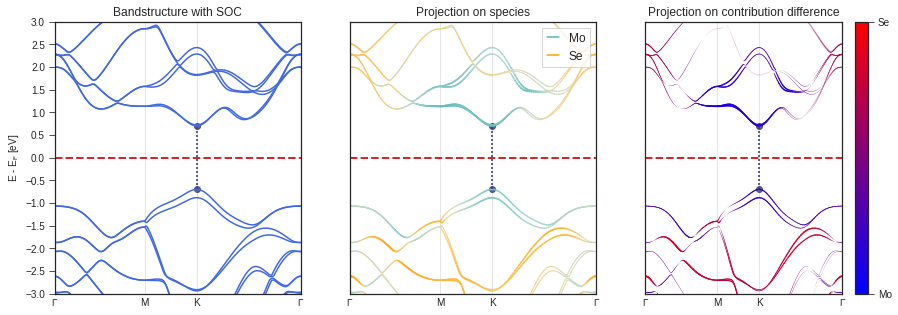

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt 

# We set up a figure and some axes
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

# On the first one, we draw just the band structure, in this case with spin-orbit coupling:
ax1 = bs.plot(axes=ax1, color="royalblue")
ax1.set_title("Band Structure with SOC")

# On the second one, we draw the contribution of all species overlaid:
ax2 = bs.plot_all_species(axes=ax2)
ax2.set_ylabel("")
ax2.set_yticks([])
ax2.set_title("Projection on species")

# On the third one, we draw the difference of the contributions as a gradient:
Mo = bs.spectrum.get_species_contribution("Mo")
Se = bs.spectrum.get_species_contribution("Se")
ax3 = bs.plot_gradient_contributions(Mo, Se, axes=ax3)
ax3.set_ylabel("")
ax3.set_yticks([])
ax3.set_title("Projection on contribution difference")
plt.show()

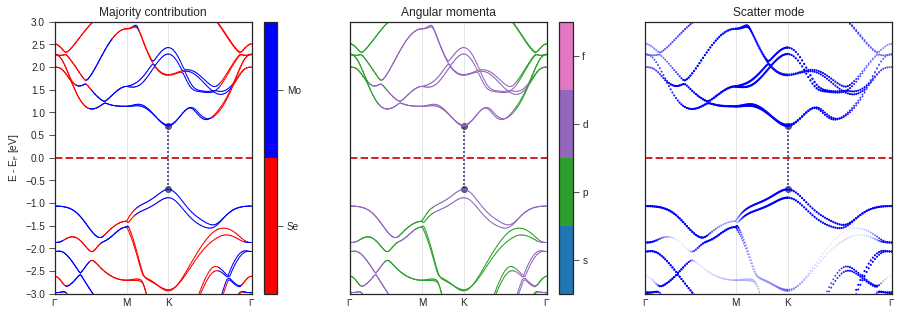

In [12]:
# Mulliken band structures typically need some customization to make them look good.
# You have many options to choose how to plot the mulliken band structure.

%matplotlib inline
import matplotlib.pyplot as plt 

# We set up a figure and some axes
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

# We can plot the contributions as a sequential or continuous color map. A sequential map is less cluttered and 
# often more readable when many species are involved, but hides a lot of information.
# Compare this representation to the gradient representation: It becomes more clear which parts of the bands belong
# to which atom, but in reality, this cannot be assigned as exactly as is suggested by this figure.
ax1 = bs.plot_majority_contributions(axes=ax1, colors=["red", "blue"])
ax1.set_title("Majority contribution")

# On the other hand side, for orbitals this representation is recommended:
ax2 = bs.plot_all_angular_momenta(axes=ax2)
ax2.set_title("Angular momenta")
ax2.set_ylabel("")
ax2.set_yticks([])

# Alternatively, you can also choose a scattered representation. It simply depends on your system which representation looks best.
ax3 = bs.plot_one_species("Mo", axes=ax3, mode="scatter", color="blue")
ax3.set_ylabel("")
ax3.set_yticks([])
ax3.set_title("Scatter mode")
plt.show()